In [28]:
import pandas as pd

In [29]:
train_df = pd.read_csv('train.csv')
display(train_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
display(train_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [31]:
missing_values = train_df.isnull().sum()

# Display headings with missing values
missing_headings = missing_values[missing_values > 0].index.tolist()
display(missing_headings)

['Age', 'Cabin', 'Embarked']

In [32]:
# Fill missing 'Age' values with the median
median_age = train_df['Age'].median()
train_df['Age'] = train_df['Age'].fillna(median_age)

# Fill missing 'Embarked' values with the mode
mode_embarked = train_df['Embarked'].mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(mode_embarked)

# Fill missing 'Cabin' values with 'Unknown'
train_df['Cabin'] = train_df['Cabin'].fillna('Unknown')

In [33]:
display(train_df.isnull().sum())

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [34]:
# Convert 'Sex' column to numerical (0 for female, 1 for male)
train_df['Sex'] = train_df['Sex'].map({'female': 0, 'male': 1})

# One-hot encode 'Embarked' column
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix='Embarked', dummy_na=False)

# One-hot encode 'Cabin' column
train_df = pd.get_dummies(train_df, columns=['Cabin'], prefix='Cabin', dummy_na=False)

display(train_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,False,False,False,False,False,False,False,False,False,True


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown
0,1,0,3,Passenger 1,1,22.0,1,0,A/5 21171,7.2500,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,Passenger 2,0,38.0,1,0,PC 17599,71.2833,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,Passenger 3,0,26.0,0,0,STON/O2. 3101282,7.9250,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,Passenger 4,0,35.0,1,0,113803,53.1000,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,Passenger 5,1,35.0,0,0,373450,8.0500,...,False,False,False,False,False,False,False,False,False,True


In [42]:
numerical_cols = train_df.select_dtypes(include=['number'])
display(numerical_cols.describe())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
survival_by_sex = train_df.groupby('Sex')['Survived'].mean()
survival_by_pclass = train_df.groupby('Pclass')['Survived'].mean()

display("Survival Rate by Sex:")
display(survival_by_sex)

display("Survival Rate by Pclass:")
display(survival_by_pclass)

'Survival Rate by Sex:'

,Survived
Sex,
0,0.742038
1,0.188908


'Survival Rate by Pclass:'

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


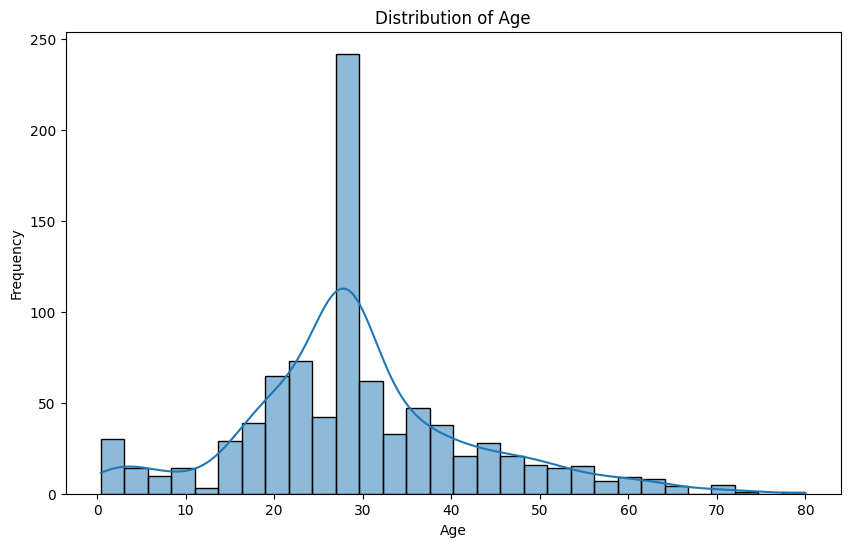

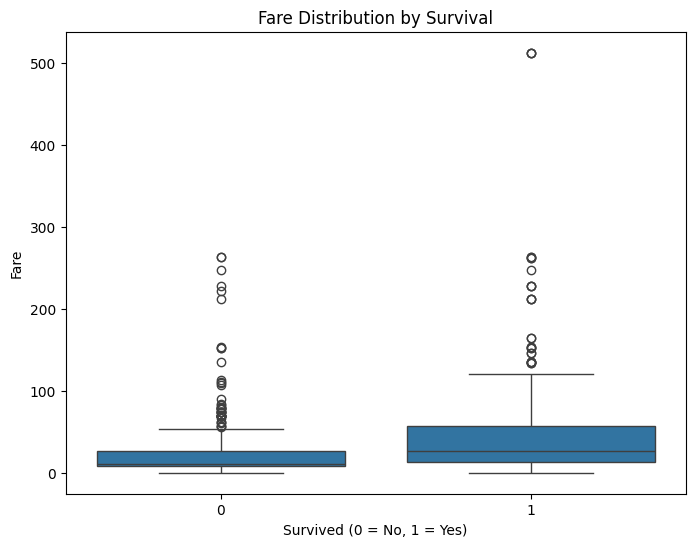

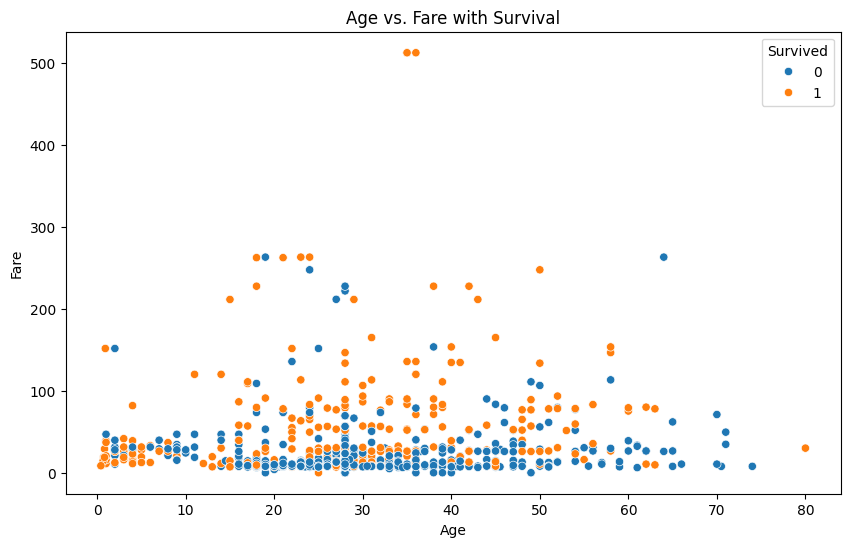

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Box plot of 'Fare' grouped by 'Survived'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=train_df)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

# 3. Scatter plot of 'Age' vs. 'Fare'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=train_df, hue='Survived')
plt.title('Age vs. Fare with Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

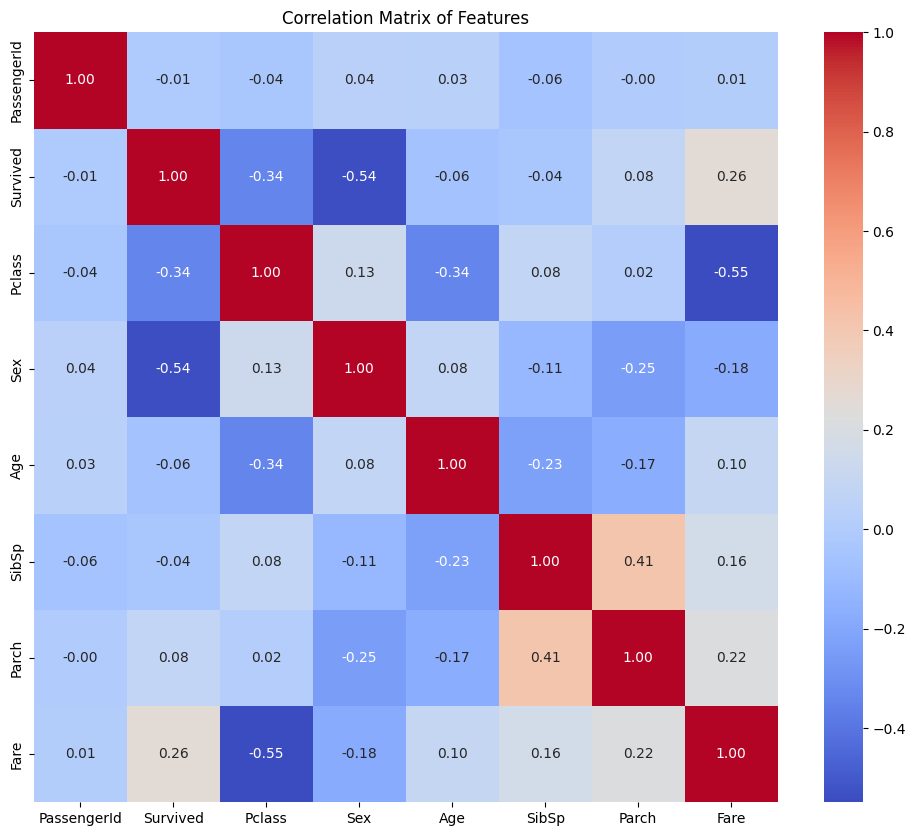

In [47]:
numerical_train_df = train_df.select_dtypes(include=['number'])
correlation_matrix = numerical_train_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

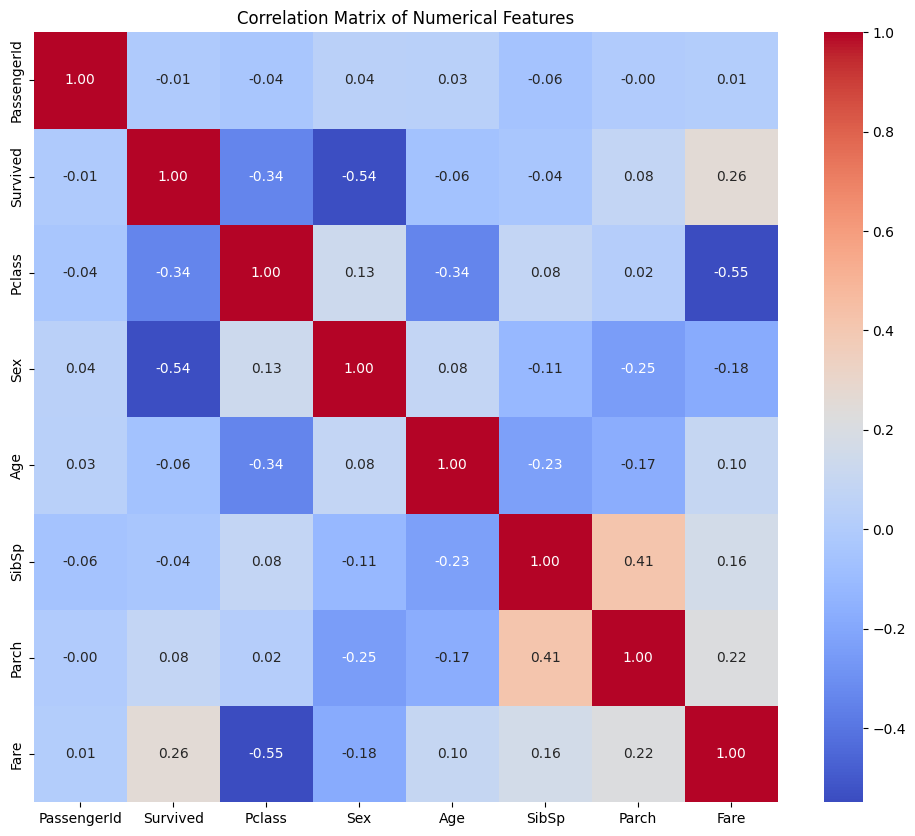

In [48]:
numerical_train_df = train_df.select_dtypes(include=['number'])
correlation_matrix = numerical_train_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

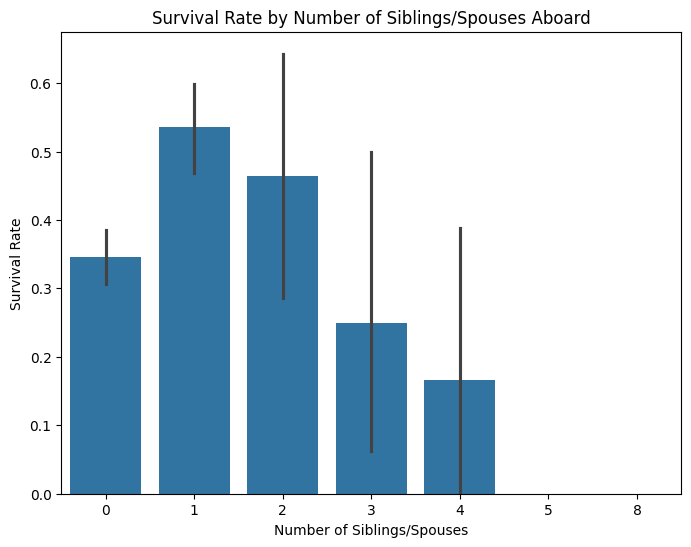

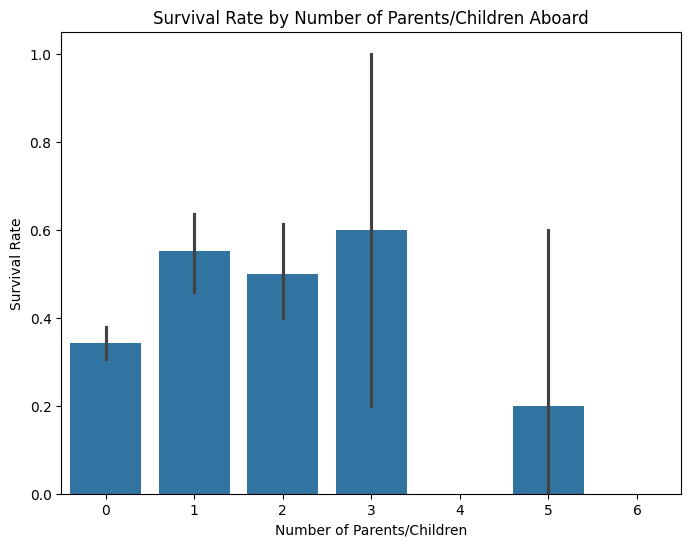

In [50]:
# Visualize survival by SibSp
plt.figure(figsize=(8, 6))
sns.barplot(x='SibSp', y='Survived', data=train_df)
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')
plt.show()

# Visualize survival by Parch
plt.figure(figsize=(8, 6))
sns.barplot(x='Parch', y='Survived', data=train_df)
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Survival Rate')
plt.show()